In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [88]:
#Ngarko të dhënat dhe trego 5 rreshtat kryesorë
df = pd.read_csv('dataset/drug200.csv')
df.head()

Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY

In [89]:
# Nxjerr informacione të rëndësishme për të dhënat
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [90]:
# Kontrolloni vlerën në secilën veçori / kolonë
for col in df.columns:
    print(f'{df[col].value_counts()}\n\n')

47    8
49    7
23    7
28    7
39    6
32    6
50    5
37    5
22    5
60    5
58    5
45    4
42    4
43    4
57    4
51    4
56    4
61    4
65    4
67    4
68    4
72    4
41    4
74    4
26    4
36    4
34    4
20    4
31    4
24    4
38    3
70    3
69    3
18    3
64    3
59    3
40    3
15    3
53    3
35    3
16    3
46    2
29    2
73    2
52    2
62    2
55    2
48    2
66    2
19    2
17    1
54    1
63    1
21    1
30    1
25    1
33    1
Name: Age, dtype: int64


M    104
F     96
Name: Sex, dtype: int64


HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64


HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64


12.006    2
18.295    2
10.444    1
19.416    1
12.703    1
         ..
15.969    1
15.156    1
22.456    1
13.598    1
9.894     1
Name: Na_to_K, Length: 198, dtype: int64


drugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: Drug, dtype: int64




In [91]:
# Kontrolloni nëse ka të dhëna të zbrazëta apo jo, prodhimi në përqindje
df.isna().sum() / len(df)

Age            0.0
Sex            0.0
BP             0.0
Cholesterol    0.0
Na_to_K        0.0
Drug           0.0
dtype: float64

In [92]:
# Kontrolloni nëse ka raste të kopjuara apo jo
df [df.duplicated () == True]

Empty DataFrame
Columns: [Age, Sex, BP, Cholesterol, Na_to_K, Drug]
Index: []

C:\Users\tahir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


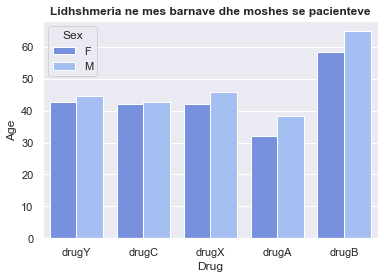

In [93]:
# Kontrolloni marrëdhëniet midis barnave dhe moshës së pacientit
sns.set()
sns.set_palette('coolwarm')
sns.barplot('Drug','Age',hue='Sex',ci=None,data=df)
plt.title('Lidhshmeria ne mes barnave dhe moshes se pacienteve',fontweight='bold')
plt.show()

C:\Users\tahir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'KRAHASIMI I PERDORIMIT TE BARNAVE')

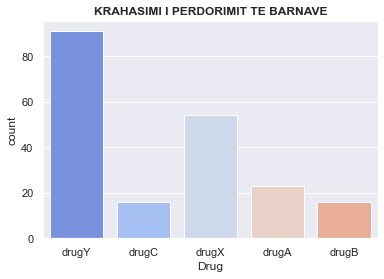

In [94]:
# Kontrolloni krahasimin e përdorimit të barnave
sns.countplot ('Drug', data = df)
plt.title ('KRAHASIMI I PERDORIMIT TE BARNAVE', fontweight = 'bold')

In [95]:
#Nxirr një vlerë nga secila kolonë e kategorisë
for col in df.select_dtypes(include=['object']):
    print(f'{df[col].value_counts()}\n\n')

M    104
F     96
Name: Sex, dtype: int64


HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64


HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64


drugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: Drug, dtype: int64




In [96]:
# Hartësimi i vlerës që do të zëvendësohet duke përdorur dictionary në python
Sex         = {'M':1, 'F':0}
BP          = {'HIGH':2, 'NORMAL':1, 'LOW': 0}
Cholesterol = {'HIGH':1, 'NORMAL':0}

In [97]:
# Ndryshimi i vlerave të kolonës
df['Sex']           = df['Sex'].replace(Sex)
df['BP']            = df['BP'].replace(BP)
df['Cholesterol']   = df['Cholesterol'].replace(Cholesterol)

## Nxirrni 5 rreshtat më të mirë për të kontrolluar nëse vlera ka ndryshuar apo jo
df.head()

In [113]:
df.head()

Age  Sex  BP  Cholesterol  Na_to_K   Drug
0   23    0   2            1   25.355  drugY
1   47    1   0            1   13.093  drugC
2   47    1   0            1   10.114  drugC
3   28    0   1            1    7.798  drugX
4   61    0   0            1   18.043  drugY

In [98]:
# Thyejini të dhënat në tiparin X dhe ndryshoren y 
y   = df['Drug']
X   = df.drop('Drug',axis=1)

In [99]:
#Ndahet në 75% train set dhe 25% test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, stratify=y)

In [100]:
# Thirrni algoritmin e pemës së vendimit dhe bëni trajnim duke përdorur të dhëna trajnimi
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [101]:
# Kontrolloni saktësinë e modelit
accuracy_score(y_test,dt.predict(X_test))

1.0

In [102]:
# Kontrolloni rezultatin modeli F1
print(classification_report(y_test,dt.predict(X_test)))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         4
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        13
       drugY       1.00      1.00      1.00        23

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [103]:
# Kontrolloni shpërndarjen e të dhënave për barnat
y.value_counts()

drugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: Drug, dtype: int64

In [104]:
# Bëni një parashikim
dt.predict([[40,0,0,0,12]])

array(['drugX'], dtype=object)

In [105]:
#Shiko tiparet më me ndikim përmes kësaj vlere
print(dict(zip(df.columns, dt.feature_importances_)))

{'Age': 0.13512260389206093, 'Sex': 0.0, 'BP': 0.26384337489270104, 'Cholesterol': 0.12411714294157629, 'Na_to_K': 0.47691687827366164}


In [106]:
# Bëni një vizualizim të pemës në një skedar pdf me emrin Decision Tree
dot_data = export_graphviz(dt,out_file=None,
                           feature_names=X.columns,
                           class_names=y.unique(),
                           filled=True,rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)                            
graph.render('Decision Tree')

'Decision Tree.pdf'

In [107]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)


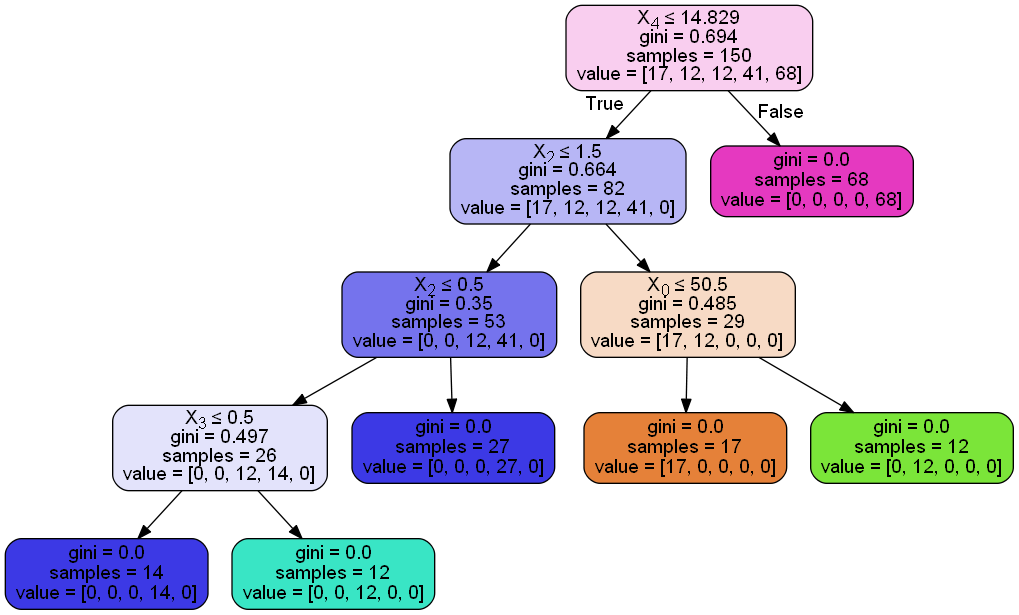

In [108]:

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [109]:
from sklearn import tree

obj=tree.DecisionTreeClassifier()
obj=obj.fit(X_train,y_train)

print(obj.tree_.max_depth)

4


In [110]:
print(obj.tree_.node_count)

11


In [111]:
# # Serializimi i objekteve
# # Ruajta e modelit
import pickle
pickle.dump(model, open('model1.pkl','wb'))

In [112]:
# # Ketu behet modeli Load qe pastaj te perdoret ne Python
# # pasi qe te thirret ne aplikacion me path absolut.
model = pickle.load(open('model1.pkl','rb'))